In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

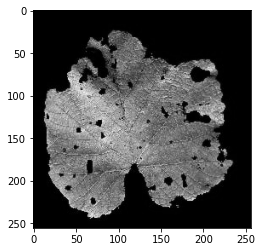

In [3]:
img = plt.imread("anggur.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap = "gray")

In [4]:
def toBiner(image):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if((image[i, j]>=40).any()):
                result[i, j] = 255
            elif ((image[i, j]<40).any()):
                result[i,j] = 0
    return result

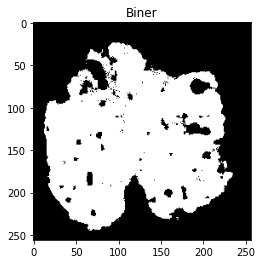

In [5]:
imgBiner = toBiner(grayImg)
plt.title("Biner")
plt.imshow(imgBiner, cmap='gray')

In [6]:
kernel = np.ones((3,3))

In [7]:
def Dilasi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    for i in range((image.shape[0] - kernel.shape[0])):
        for j in range((image.shape[1] - kernel.shape[1])):
            if((image[i,j] == 255)).any():
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        if(kernel[k,l] == 1):
                            result[(i+k),(j+l)] = 255
    return result

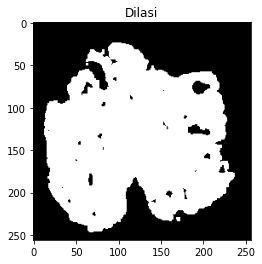

In [8]:
dilasiImg = Dilasi(imgBiner, kernel)
plt.title("Dilasi")
plt.imshow(dilasiImg, cmap = "gray")

In [9]:
def Erosi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0] - kernel.shape[0]):
        for j in range(image.shape[1] - kernel.shape[1]):
            if((image[i, j] == 0).any()):
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        if(kernel[k, l] == 1):
                            result[i+k,j+l] = 0 
            result[i+k,j+l] = 255
    return result

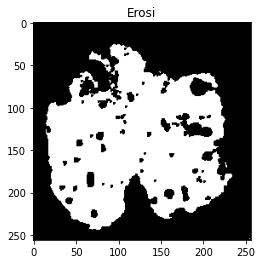

In [10]:
erosiImg = Erosi(imgBiner, kernel)
plt.title("Erosi")
plt.imshow(erosiImg, cmap = "gray")

In [11]:
def Opening(image, kernel):
    result = np.zeros(image.shape).astype(int)
    erosiImg = Erosi(image, kernel)
    result = Dilasi(erosiImg, kernel)
    return result

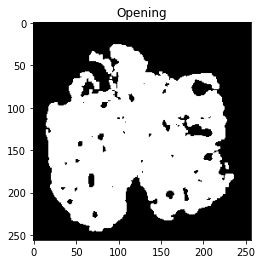

In [12]:
openingImg = Opening(imgBiner, kernel)
plt.title("Opening")
plt.imshow(openingImg, cmap = "gray")


In [13]:
def Closing(image, kernel):
    result = np.zeros(image.shape).astype(int)
    dilasiImg = Dilasi(image, kernel)
    result = Erosi(dilasiImg, kernel)
    return result

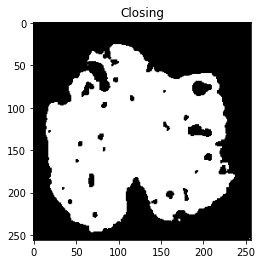

In [14]:
closingImg = Closing(imgBiner, kernel)
plt.title("Closing")
plt.imshow(closingImg, cmap = "gray")

=== HASIL PENGOLAHAN ===

Text(0.5, 1.0, 'Opening')

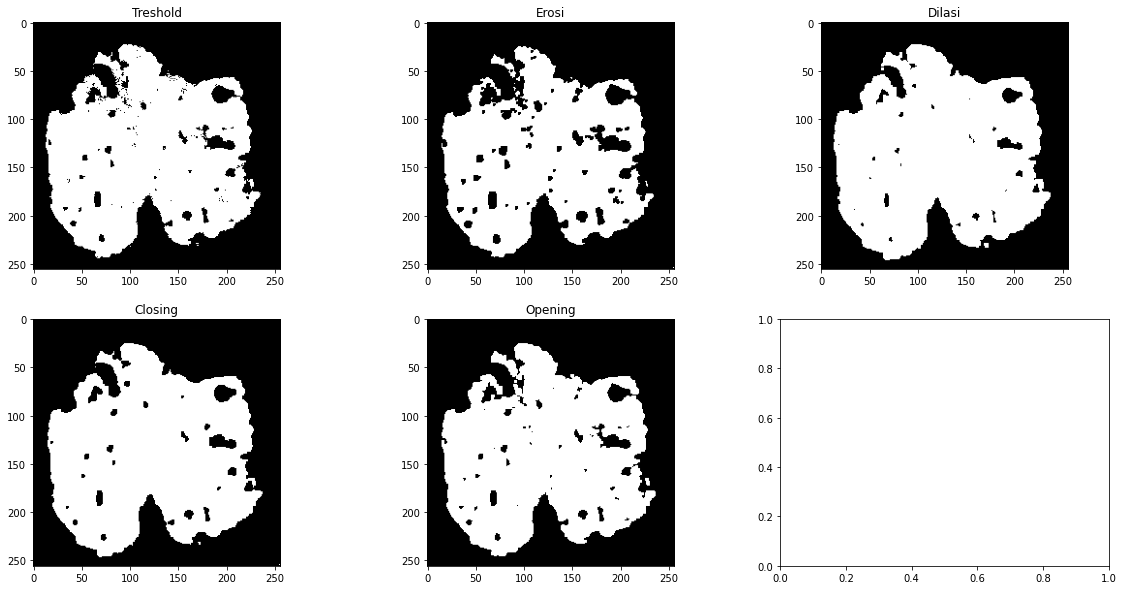

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax[0][0].imshow(imgBiner, cmap="gray")
ax[0][0].set_title('Treshold')
ax[0][1].imshow(erosiImg, cmap="gray")
ax[0][1].set_title('Erosi')
ax[0][2].imshow(dilasiImg, cmap="gray")
ax[0][2].set_title('Dilasi')
ax[1][0].imshow(closingImg, cmap="gray")
ax[1][0].set_title('Closing')
ax[1][1].imshow(openingImg, cmap="gray")
ax[1][1].set_title('Opening')